In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tracks_result.csv', sep=',')

In [3]:
(df==0).sum() # проверили массив на нулевые значения

artist_name      0
song_name        0
duration       596
playcount        0
listeners        0
tag              0
dtype: int64

In [4]:
(df.tag=='Unknown').sum() # сколько песен не имеют определенного тэга (жанра)

35

In [5]:
df.duration=df.duration[:]/60000 # перевели длительность песен из миллисекунд в минуты (в 1 минуте 60000 миллисекунд) для удобства анализа

In [6]:
df

,artist_name,song_name,duration,playcount,listeners,tag
0,SZA,Kill Bill,2.566667,17429320,987007,pop
1,"Tyler, the Creator",See You Again (feat. Kali Uchis),3.000000,16466512,1002965,rap
2,pinkpantheress,Boy's a liar Pt. 2,0.000000,8772363,724864,rap
3,Frank Ocean,Pink + White,3.066667,21272327,1105199,rnb
4,Fifty Fifty,Cupid - Twin Ver.,0.000000,3895874,355420,pop
...,...,...,...,...,...,...
2145,Ariana Grande,pov,3.333333,7396618,472265,rnb
2146,Nirvana,All Apologies,4.016667,9185567,1364470,Grunge
2147,NMixx,DICE,0.000000,4006601,177227,banger cry about it
2148,SZA,Doves in the Wind (feat. Kendrick Lamar),4.433333,3815810,387544,alternative rnb


C:\Users\spenc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

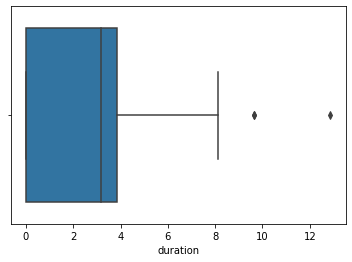

In [9]:
# график 1
sns.boxplot(df.duration)

In [10]:
df.duration.max()

12.866666666666667

График 1 показывает, что в продолжительности песен есть выбросы. Проверили на максимальное значение, получилось почти 13 минут, что очень нестандартно для нынешних композиций. 

In [28]:
df.duration.replace(0, df.duration.median(), inplace=True) 

Заменим нулевые значения переменной duration на медиану по этому признаку, так как она менее чувтвительна к выбросам

<AxesSubplot:>

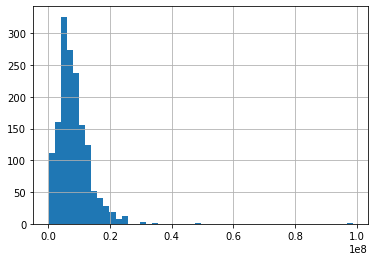

In [20]:
# график 2
(df.playcount).hist(bins=50)

Распределение переменной playcount не является нормальным, но немного похоже на него.

<AxesSubplot:>

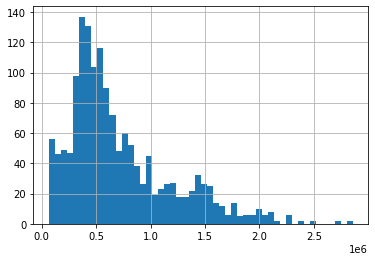

In [21]:
# график 2
(df.listeners).hist(bins=50)

Распределение переменной listeners не похоже на нормальное, можно дегко заметить его несемметричность.

На данный момент визуализаций и обратки данных мало, так как мы смогли полностью спарсить данные только 15.05.2023 (но работали над этим достаточно давно)
В дальнейшем планируем плотно над этим поработать, пока сделали то, что смогли.
Подробнее о планах: 
Хотим получить новые признаки (длинна названия песни, стандартное отклонение количества слушателей, возможны дополнения)
Модель машинного обучения будет предсказывать количество стримов (playcounts), с моделью еще не определились, будем смотреть, то что лучше работает (регрессия, случайный лес, тд.)
Насчет конкретных гипотез мы еще не определились, но можем проверить гипотезу о равенстве популярности конкретных жанров.

